## Final Project Submission

Please fill out:
* Student name: Arnold Chovu Kalage
* Student pace: Data Science Full Time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [3]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
%matplotlib inline


In [4]:
# Load the data
df = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-2-project-v2-3\data\kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.shape

(21597, 21)

# Data Understanding

The data used in this analysis is for a King County Housing price. The data essentially contains the data that can be used by any stakeholder who is looking to buy a house in King County. The data set contains 21597 entries and 21 rows. The rows contains elements that describe the house in depth, i.e., number of bedrooms, the area of the house, zipcode, year built, the are of the basement and many more characteristics. This features described by the data set can be really helpful for individuals looking to buy houses in King County. The data can show the relationship of the features in the dataset and the price of the houses. However, before the data can be used, we have to perfomr data cleaning to ensure we are working with the right data hence coming up with relevant conclusions. 

The target for our model is the price column which gives us 20 columns to use in constructing a model. A model for the price will be really essential for individuals who deal in real estate. They can see the important aspects of a house that increase the price of the house. 

# Data Cleaning

#### Transforming the data types

The first observation I made on the data types is the fact that sqft_basement is an object rather than a float or an integer. The measurement of are is always in numerical form. I will convert the data to a float so that it can also be used in analysis. 

In [7]:
# Check the unique values in sqft_basement to find the '?'
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

We can see the '?' hidden between the values. This might be the character that led to the columne being encoded as an object rather than an integer or a float.

In [8]:
# Drop the row with the question mark since it is a negligible number of rows
df = df[df['sqft_basement'] != '?']

In [9]:
# Check if the '?' is dropped
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [10]:
# sqft_basement to float
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [11]:
# check if the transformation worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

#### Checking and removing null values

Looking at the info on the data, we can see that the waterfront and the year renovate columns have missing values.

In [12]:
# Check for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# Create a function for calculating the percentage of missing values
def percentage_missing_values(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing,
                                 'number_missing': data.isnull().sum()})
    return missing_value_df

In [14]:
# Pass our data thorugh the function
percentage_missing_values(df)

column_name  percent_missing  number_missing
id                        id         0.000000               0
date                    date         0.000000               0
price                  price         0.000000               0
bedrooms            bedrooms         0.000000               0
bathrooms          bathrooms         0.000000               0
sqft_living      sqft_living         0.000000               0
sqft_lot            sqft_lot         0.000000               0
floors                floors         0.000000               0
waterfront        waterfront        11.062763            2339
view                    view         0.288512              61
condition          condition         0.000000               0
grade                  grade         0.000000               0
sqft_above        sqft_above         0.000000               0
sqft_basement  sqft_basement         0.000000               0
yr_built            yr_built         0.000000               0
yr_renovated    yr_renovated        17.755285            3754
zipcode              zipcode         0.000000               0
lat                      lat         0.000000               0
long                    long         0.000000               0
sqft_living15  sqft_living15         0.000000               0
sqft_lot15        sqft_lot15         0.000000               0

As expected, the waterfront (11.06%), yr_renovated (17.76%) and view (0.29%) columns have missing values. Since the data set has 21000 entries, dropping the rows with the missing values will lead to the loss of a chunk of data. Since we are not going to drop the roes or the columns, we are going to fill the rows with a common value for the said columns. We begin by investigating the statistics for the said columns so that we choose which value to use when filling the null values.

In [15]:
# Understanding the view column
df.view.head(30)

0          NONE
1          NONE
2          NONE
3          NONE
4          NONE
5          NONE
7           NaN
8          NONE
9          NONE
10         NONE
11         NONE
12         NONE
13         NONE
14         NONE
15         GOOD
16         NONE
17         NONE
19         NONE
20         NONE
21    EXCELLENT
22         NONE
23         NONE
24         NONE
25         NONE
26         NONE
27         NONE
28         NONE
29         NONE
30         NONE
31         NONE
Name: view, dtype: object

In [16]:
# Checking for the view column
df['view'].describe()

count     21082
unique        5
top        NONE
freq      19018
Name: view, dtype: object

In [17]:
df['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

Upon further investigation of the view column, I found out that it contains over 19000 none values used as placeholder values. Due to this, I will drop the column because it will intefere with analysis and developing a model. 

In [18]:
# Drop the view column
df = df.drop('view', axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  object 
 9   condition      21143 non-null  object 
 10  grade          21143 non-null  object 
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   17389 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

In [20]:
# Exploring the waterfront column
print(df.waterfront.head())
print(df.waterfront.value_counts())

0    NaN
1     NO
2     NO
3     NO
4     NO
Name: waterfront, dtype: object
NO     18662
YES      142
Name: waterfront, dtype: int64


We can see that more than 18000 of our values have the value 'NO' for the waterfront which means that the house does not have waterfronts. Therefore I am going to assume that the rows with missing values are for house with no waterfront, and fill the missing values with 'NO'. 

In [21]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

After trying to fill the column, I ended up with more missing values than before. I might have made a mistake with that so I am just going to drop the column because it will not be of help. 

In [22]:
# Drop the waterfront column
df = df.drop('waterfront', axis = 1)

In [23]:
# check the data frame preview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   condition      21143 non-null  object 
 9   grade          21143 non-null  object 
 10  sqft_above     21143 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21143 non-null  int64  
 13  yr_renovated   17389 non-null  float64
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

Moving on to the yr_renovated column, we can get the summary statistics to understanf the column then use a value to fill the missing values

In [24]:
# Checking the summary statistics for the yr_renovated
df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [25]:
# Checking the values in the column
df.yr_renovated.value_counts()

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

It seems like 16666 people put 0 for the year they got their house renovated. I assume that the 0 meant that they nver got their houses renovated. Since this feels like a safe assumption for our data, I am going to fill the missing values with the median which is 0. 

In [26]:
# Fill the missing values in yr_renovated column with the median
yr_renovated_median = df.yr_renovated.median()
df.yr_renovated = df.yr_renovated.fillna(value = yr_renovated_median)
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   

    sqft_lot  floors  condition          grade  sqft_above  sqft_basement  \
0       5650     1.0    Average      7 Average        1180            0.0   
1       7242     2.0    Average      7 Average        2170          400.0   
2      10000     1.0    Average  6 Low Average         770            0.0   
3       5000     1.0  Very Good      7 Average        1050          910.0   
4       8080     1.0    Average         8 Good        1680            0.0   
5     101930     1.0    Average   11 Excellent        3890         1530.0   
7       9711     1.0    Average      7 Average        1060            0.0   
8       7470     1.0    Average      7 Average        1050          730.0   
9       6560     2.0    Average      7 Average        1890            0.0   
10      9796     1.0    Average         8 Good        1860         1700.0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955           0.0    98178  47.5112 -122.257           1340   
1       1951        1991.0    98125  47.7210 -122.319           1690   
2       1933           0.0    98028  47.7379 -122.233           2720   
3       1965           0.0    98136  47.5208 -122.393           1360   
4       1987           0.0    98074  47.6168 -122.045           1800   
5       2001           0.0    98053  47.6561 -122.005           4760   
7       1963           0.0    98198  47.4095 -122.315           1650   
8       1960           0.0    98146  47.5123 -122.337           1780   
9       2003           0.0    98038  47.3684 -122.031           2390   
10      1965           0.0    98007  47.6007 -122.145           2210   

    sqft_lot15  
0         5650  
1         7639  
2         8062  
3         5000  
4         7503  
5       101930  
7         9711  
8         8113  
9         7570  
10        8925

In [27]:
# Check if there are any missing values remaining
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Our data is clean, as far as missing values are concerned!

#### Outliers


In [28]:
# Checking for outliers in the data
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.114300e+04  2.114300e+04  21143.000000  21143.000000  21143.000000   
mean   4.581004e+09  5.405107e+05      3.372558      2.116079   2080.920730   
std    2.876328e+09  3.680751e+05      0.924917      0.768531    918.547562   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.309100e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  2.114300e+04  21143.000000  21143.000000   21143.000000  21143.000000   
mean   1.508714e+04      1.493591   1789.069006     291.851724   1971.023223   
std    4.120920e+04      0.539249    828.409769     442.498337     29.321938   
min    5.200000e+02      1.000000    370.000000       0.000000   1900.000000   
25%    5.043000e+03      1.000000   1200.000000       0.000000   1952.000000   
50%    7.620000e+03      1.500000   1560.000000       0.000000   1975.000000   
75%    1.069550e+04      2.000000   2210.000000     560.000000   1997.000000   
max    1.651359e+06      3.500000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21143.000000  21143.000000  21143.000000  21143.000000    21143.00000   
mean      68.256492  98077.868893     47.560274   -122.213876     1987.27139   
std      362.765827     53.535756      0.138591      0.140597      685.67034   
min        0.000000  98001.000000     47.155900   -122.519000      399.00000   
25%        0.000000  98033.000000     47.471250   -122.328000     1490.00000   
50%        0.000000  98065.000000     47.572000   -122.230000     1840.00000   
75%        0.000000  98117.000000     47.678200   -122.125000     2360.00000   
max     2015.000000  98199.000000     47.777600   -121.315000     6210.00000   

          sqft_lot15  
count   21143.000000  
mean    12738.941967  
std     27169.273663  
min       651.000000  
25%      5100.000000  
50%      7626.000000  
75%     10087.000000  
max    871200.000000

Checking the max values, we can see that the bedroom column has ne with 33 bedrooms. This is very odd and unusual for a house hence that might be faulty data. We can plot a scatter plot for the bedroom column to better understand the outliers.

c:\Users\Arnold Chovu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


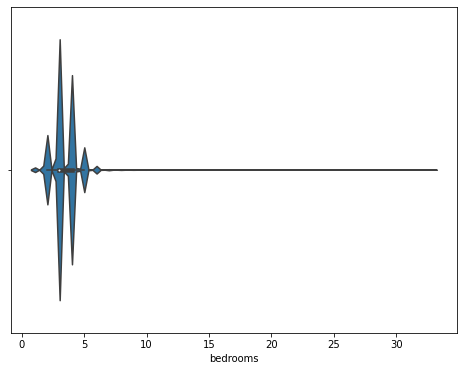

In [29]:
# Plot a scatterplot for the bedroom column
plt.figure(figsize=(8, 6))
sns.violinplot(df.bedrooms);

In [30]:
# Check for the values
df.bedrooms.sort_values(ascending = False)

15856    33
8748     11
15147    10
19239    10
13301    10
         ..
9509      1
17404     1
12811     1
12817     1
13563     1
Name: bedrooms, Length: 21143, dtype: int64

The house with 33 bedrooms is obviously an outlier becasue of a mistake. I am going to drop the row with 33 bedrooms because of this reason.

In [31]:
# Drop the row
df = df[df['bedrooms'] <= 11]
df.bedrooms.sort_values(ascending = False)

8748     11
15147    10
19239    10
13301    10
4092      9
         ..
9509      1
17404     1
12811     1
12817     1
13563     1
Name: bedrooms, Length: 21142, dtype: int64

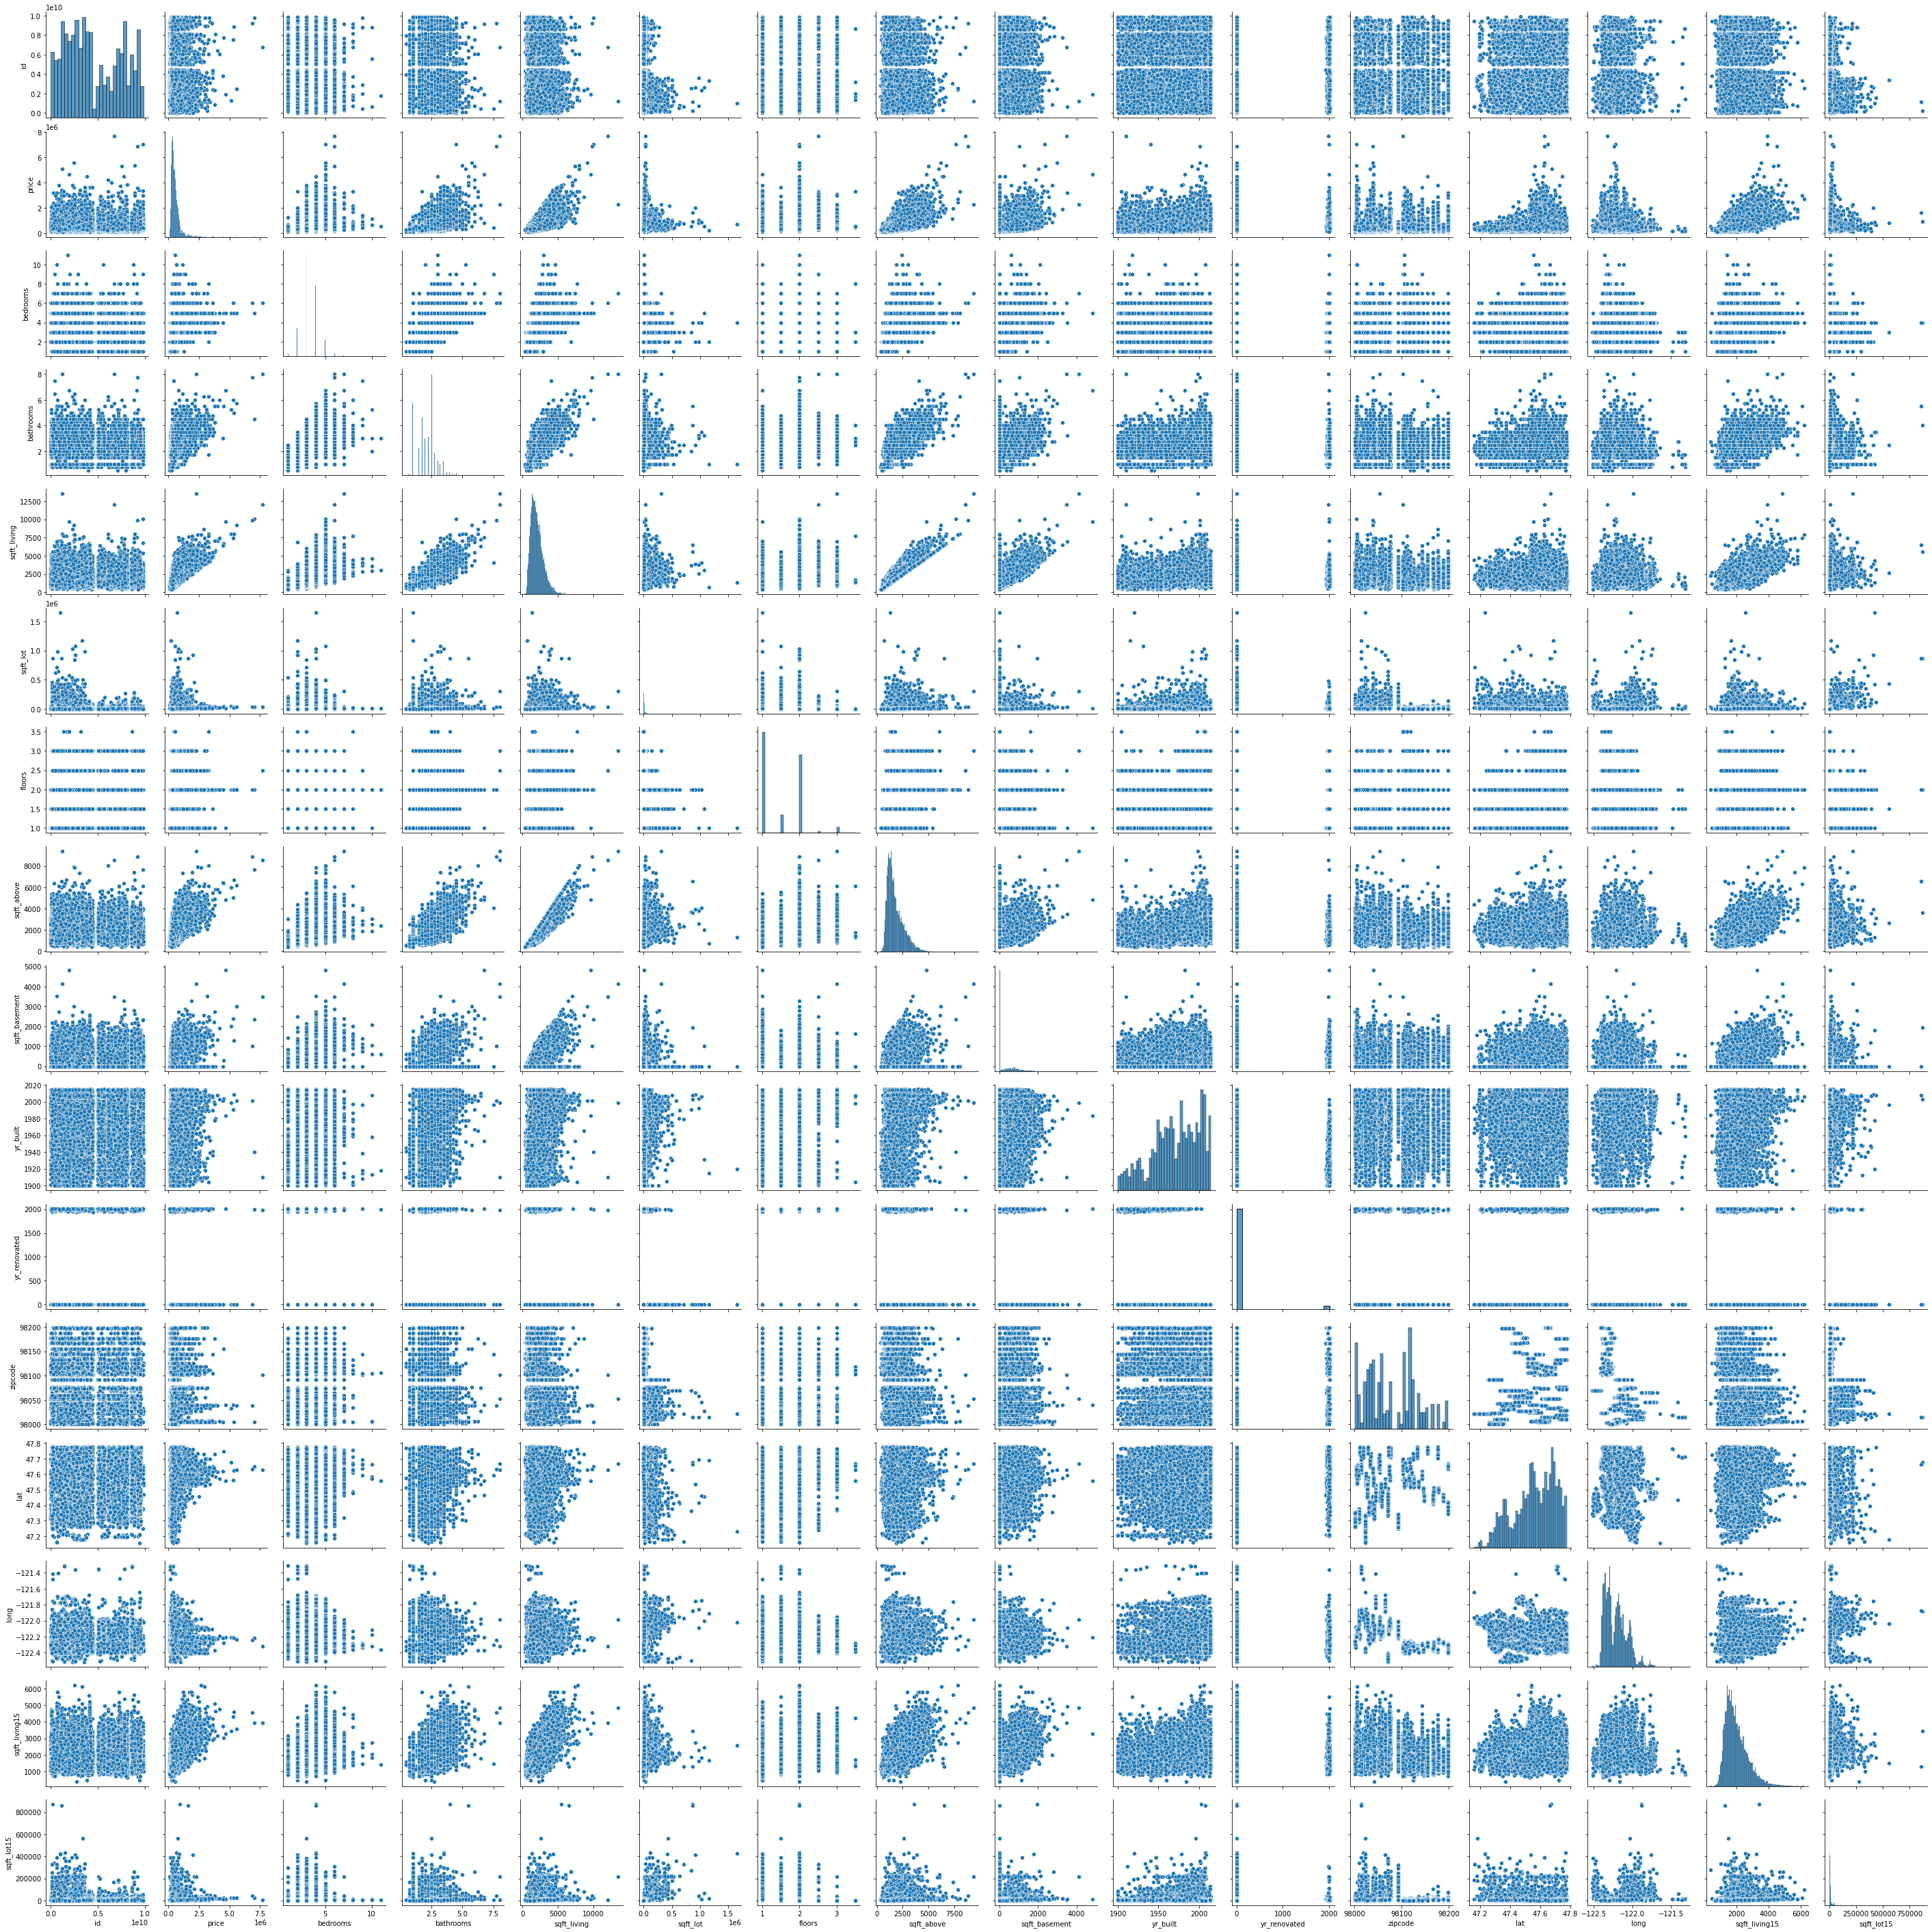

In [48]:
# Correlation plot for the data
sns.pairplot(df)

# Building the Linear Regression Model

After cleaning the data and investigating for outliers, out next step is obviously to check for relationship between the features and our target. Our target, in this case, is the price of the houses since we want to predict the future prices of the houses given the features. We can start with a simple linear regression then move to the multiple regression model where we can use different features in predicting the price of the houses. 

In [32]:
# Preview the columns of our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   date           21142 non-null  object 
 2   price          21142 non-null  float64
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   condition      21142 non-null  object 
 9   grade          21142 non-null  object 
 10  sqft_above     21142 non-null  int64  
 11  sqft_basement  21142 non-null  float64
 12  yr_built       21142 non-null  int64  
 13  yr_renovated   21142 non-null  float64
 14  zipcode        21142 non-null  int64  
 15  lat            21142 non-null  float64
 16  long           21142 non-null  float64
 17  sqft_living15  21142 non-null  int64  
 18  sqft_l

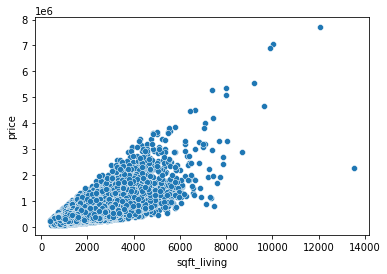

In [33]:
 # Check for a linear relationship between the price and sqft_living
sns.scatterplot(x=df.sqft_living, y=df.price);

From the scatter plot we can see that the two have a linear relationship. We can now start creating a model that will clearly depict the relationship between the two. 

In [34]:
# creating the X and y variables for the model for the simple linear model
X = df[['sqft_living']]
y = df['price']

In [35]:
# create the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [36]:
# Fit the model
results = model.fit()
results

In [37]:
# Print the summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:05:27   Log-Likelihood:            -2.9377e+05
No. Observations:               21142   AIC:                         5.875e+05
Df Residuals:                   21140   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.515e+04   4462.546    -10.118      0.000   -5.39e+04   -3.64e+04
sqft_living   281.4386      1.962    143.455      0.000     277.593     285.284
==============================================================================
Omnibus:                    14518.471   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535813.648
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      27.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, our model explains about 49.3% of the variance in the price. The p-value of the F-Statistic is well below the alpha (0.05) hence we can reject the null hypothesis and conclude that our model is statistically significant. Both our intercept and coeffecient for sqft_living are sttistically significant. The intercept is about -45150 meaning that a house with 0 square feet of living area will cost -$45150 which will increase by $281 for every squarefoot. 

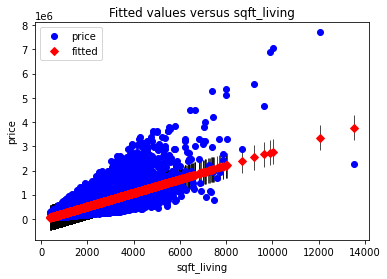

In [38]:
# Plot the model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

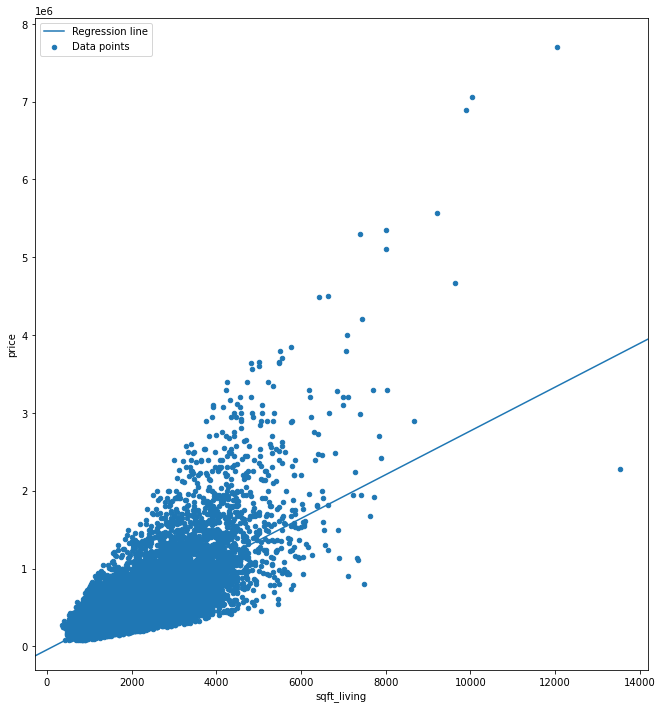

In [39]:
# abline plot for easier understanding
fig, ax = plt.subplots(figsize = (11, 12))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

In [40]:
# Check the residuals
results.resid

0        -65046.002311
1       -140145.678866
2          8443.830342
3         97531.877032
4         82334.689576
             ...      
21592    -25449.517990
21593   -204971.638647
21594    160185.176286
21595     -5150.221126
21596     83084.176286
Length: 21142, dtype: float64

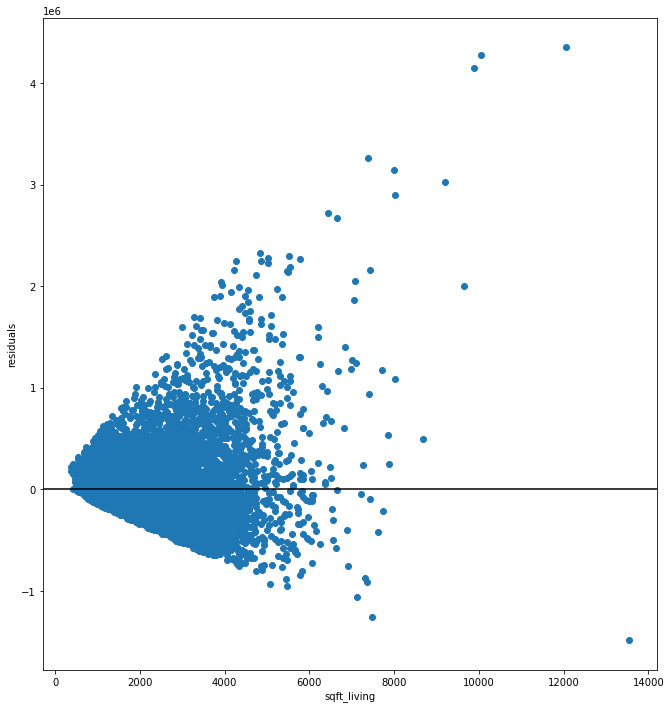

In [41]:
# Plot the residuals
fig, ax = plt.subplots(figsize = (11, 12))

ax.scatter(df["sqft_living"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

For the multilinear model, I will create a subset of the data which will contain the features that will be used to project the target. My features in this case include, sqft_living, sqft_basement, bedrooms, and floors. The model will predict how the number of bedrooms, and floors and the area of the living room affect the price of the houses. 

In [42]:
# Create a subset containing the features
df_subset = df[['price', 'sqft_living', 'sqft_basement', 'bedrooms', 'floors', 'grade']].copy()
df_subset.head(10)

price  sqft_living  sqft_basement  bedrooms  floors          grade
0    221900.0         1180            0.0         3     1.0      7 Average
1    538000.0         2570          400.0         3     2.0      7 Average
2    180000.0          770            0.0         2     1.0  6 Low Average
3    604000.0         1960          910.0         4     1.0      7 Average
4    510000.0         1680            0.0         3     1.0         8 Good
5   1230000.0         5420         1530.0         4     1.0   11 Excellent
7    291850.0         1060            0.0         3     1.0      7 Average
8    229500.0         1780          730.0         3     1.0      7 Average
9    323000.0         1890            0.0         3     2.0      7 Average
10   662500.0         3560         1700.0         3     1.0         8 Good

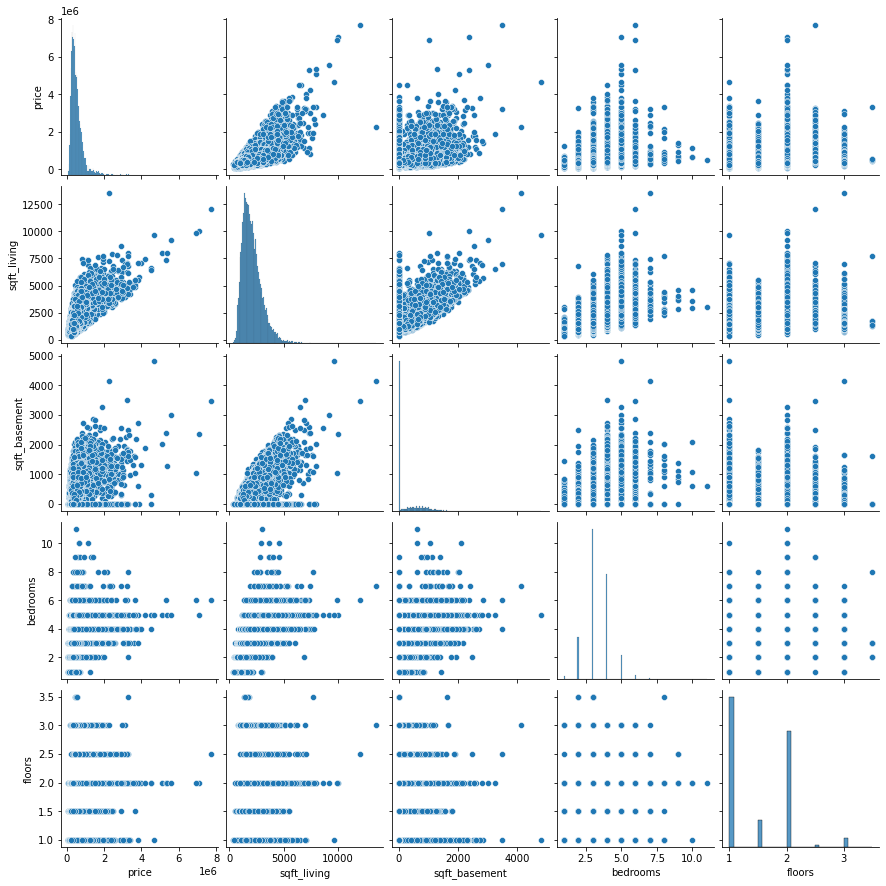

In [49]:
# Correlation for the subset data
sns.pairplot(df_subset)

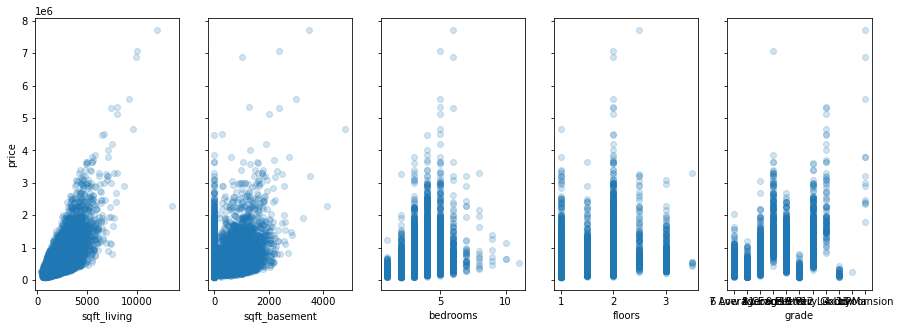

In [43]:
# Visualize the relationship between the features
fig, axes = plt.subplots(ncols=5, figsize=(15, 5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(df_subset.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(df_subset[col], df_subset["price"], alpha=0.2)
    ax.set_xlabel(col)

Most variable appear to have a linear relationship except the floors and grade variable. We will drop the variable when creating the x variable for our multiple linear regression model. 

In [44]:
# Create the X variable for our model
X_multi_model = df_subset.drop(['price', 'floors', 'grade'], axis = 1)


In [45]:
# Creating the model
multi_model = sm.OLS(endog = y, exog = sm.add_constant(X_multi_model.astype(float)))
multi_results = multi_model.fit()

In [46]:
# Print the summary
print(multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7325.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:05:32   Log-Likelihood:            -2.9342e+05
No. Observations:               21142   AIC:                         5.869e+05
Df Residuals:                   21138   BIC:                         5.869e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.747e+04   6932.625     14.060

Our multilinear model is statistically significant since the intercepts and the constant are significantly lower than the alpha (0.05). The model also explains about 51% of the variance in price. This is slightly greater than our simple linear model. This model is statistically better than the simple linear model since it exlains more variance for our target. 

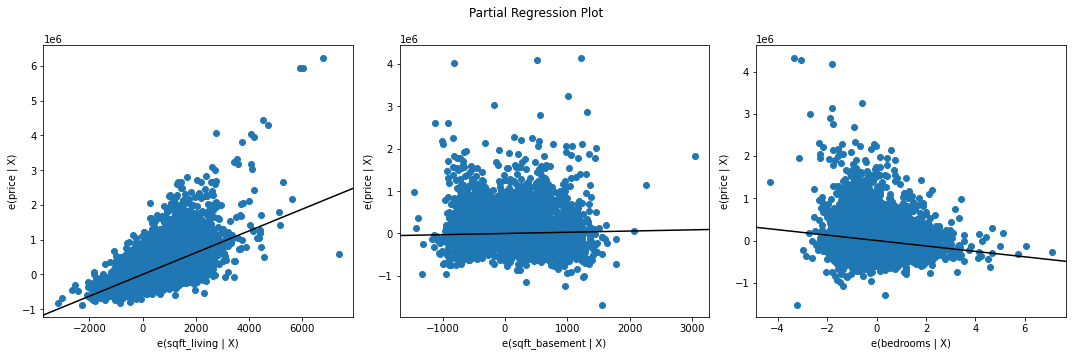

In [47]:
# Plot the Partial regression Plots
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    multi_results,
    exog_idx=list(X_multi_model.columns),
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

The multi regression model shows that the sqft_living is the best predictor of the three. It's relationship with the price of the house is very strong. Initially, the number f bedrooms was the best candidate to determine the price of the house but the model does not show that. 